<a href="https://colab.research.google.com/github/mehrshadhosseini28/digikala_quera_2020/blob/master/Digikala_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, requests

url = 'https://quera.ir/assignment/20120/download_problem_initial_project/66279/'
fname = "/content/P4.zip"


if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)
else:
  print("this file is exist: ")

In [ ]:
import zipfile
with zipfile.ZipFile('/content/Computer_Vision_Users.zip', 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [ ]:
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
# from color_recognition_api import knn_classifier as knn_classifier
from PIL import Image
from IPython.display import display
from tqdm.notebook import tqdm
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow

# P4_T1

In [ ]:
colormap={
    'pink':1,
    'purple':2,
    'yellow':3,
    'orange':4,
    'white':5,
    'silver':6,
    'grey':7,
    'black':8,
    'red':9,
    'brown':10,
    'green':11,
    'blue':12
}

In [ ]:
def my_func(m):
    return m[0]-m[1],m[0]-m[2],m[1]-m[2]

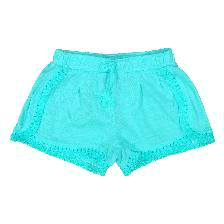

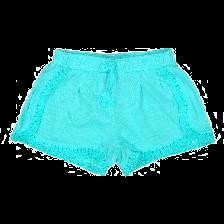

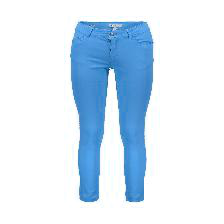

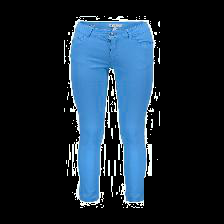

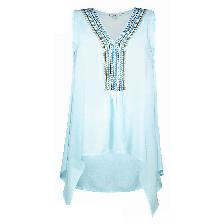

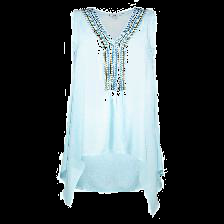

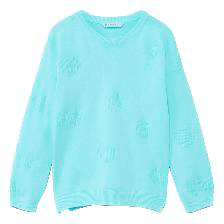

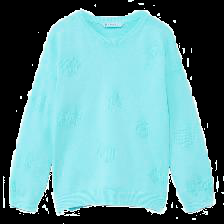

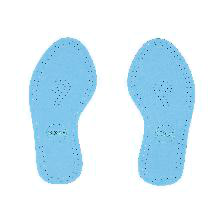

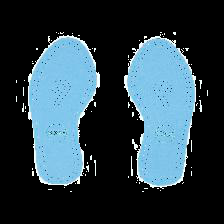

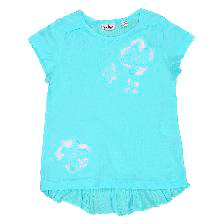

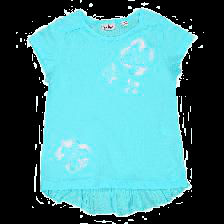

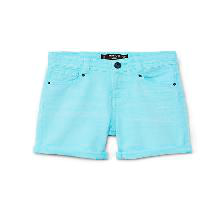

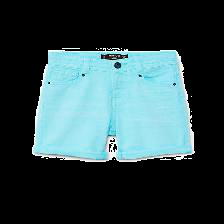

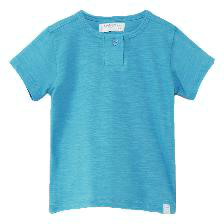

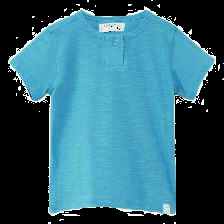

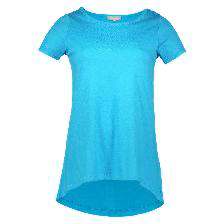

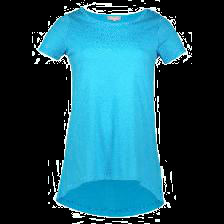

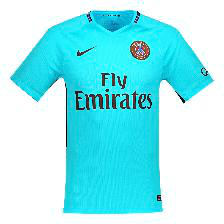

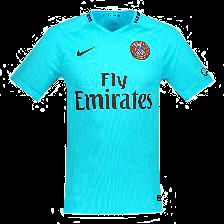

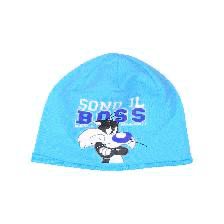

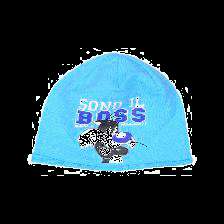

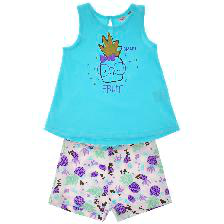

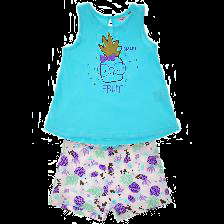

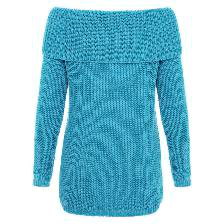

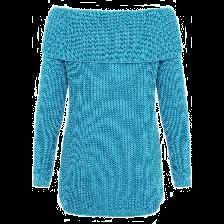

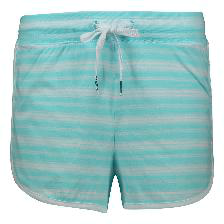

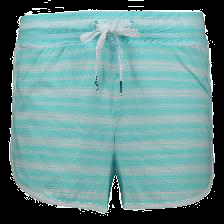

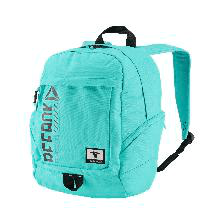

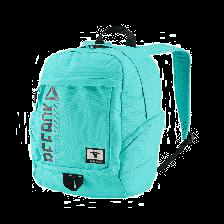

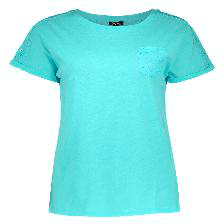

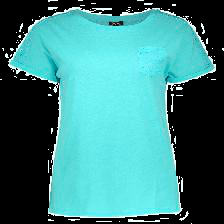

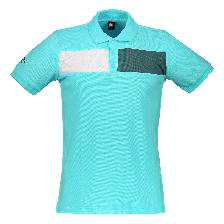

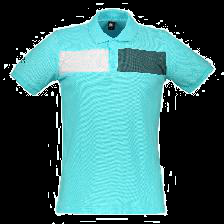

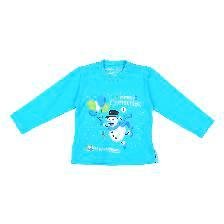

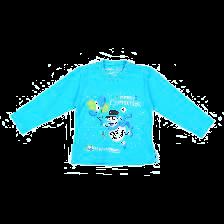

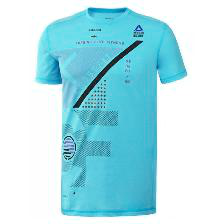

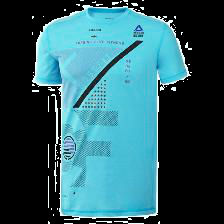

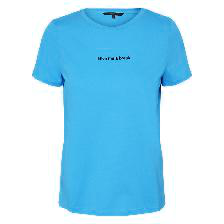

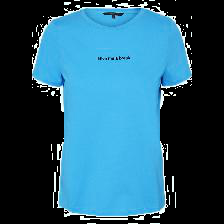

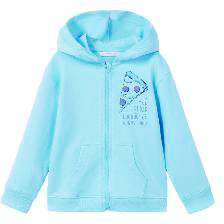

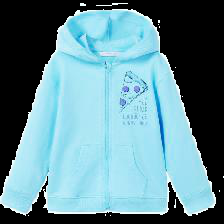

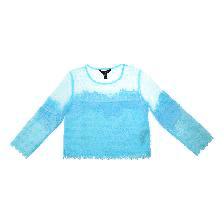

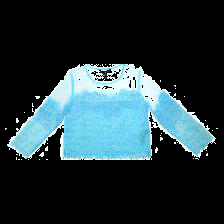

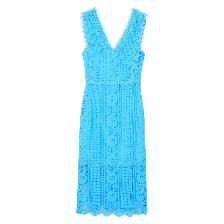

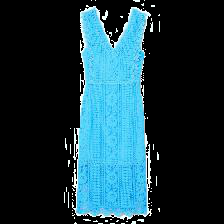

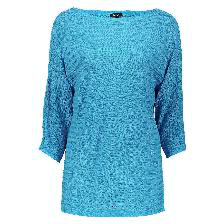

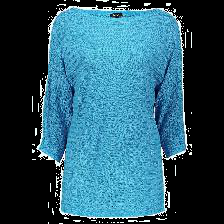

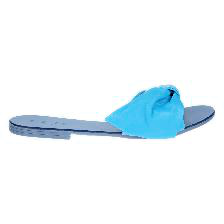

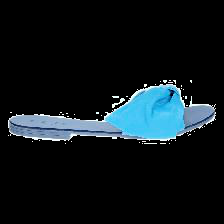

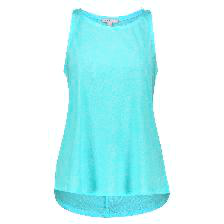

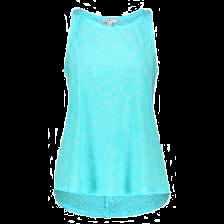

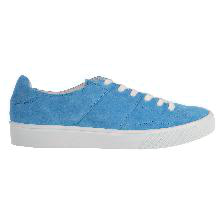

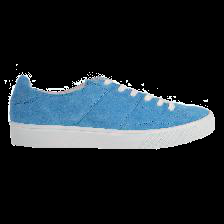

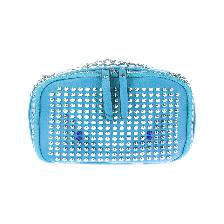

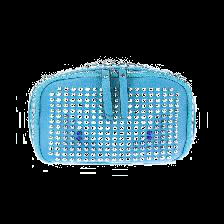

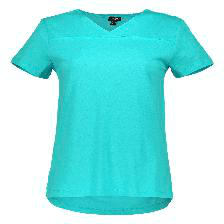

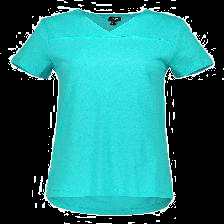

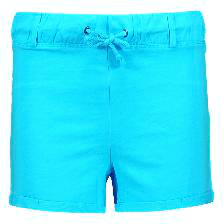

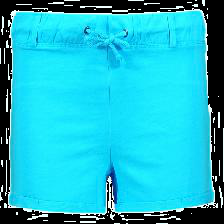

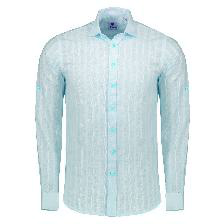

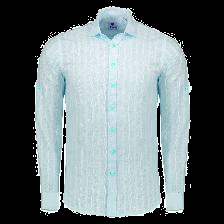

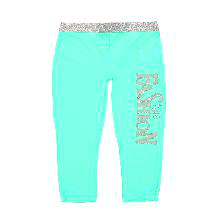

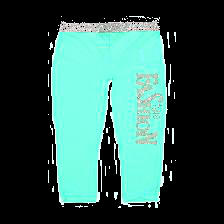

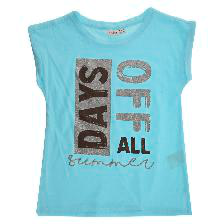

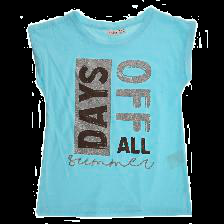

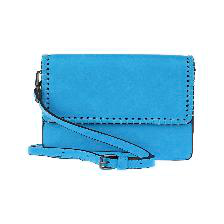

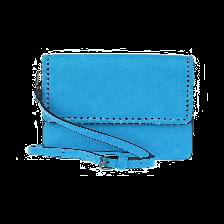

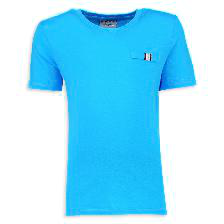

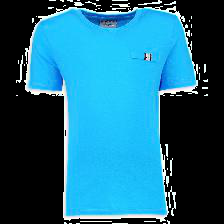

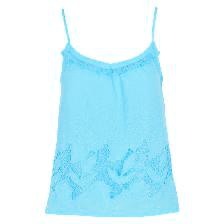

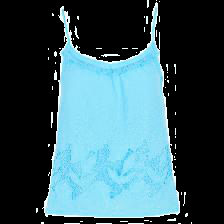

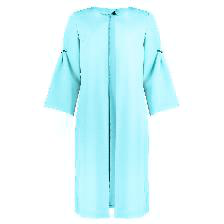

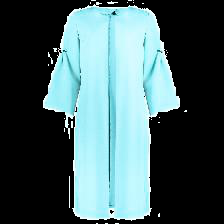

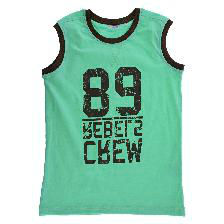

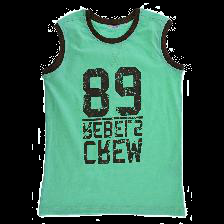

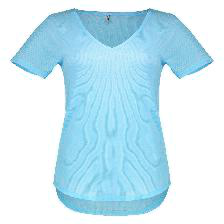

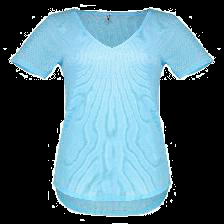

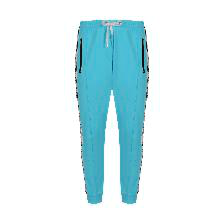

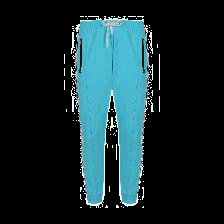

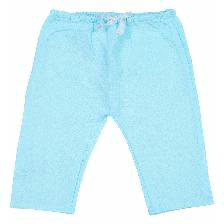

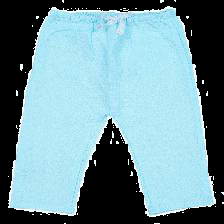

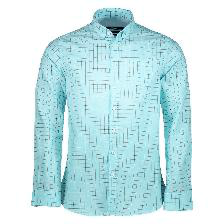

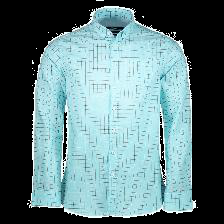

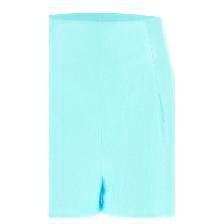

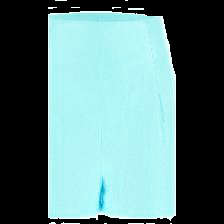

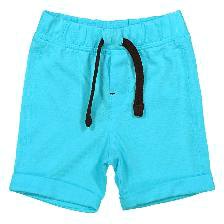

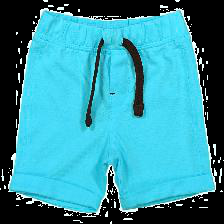

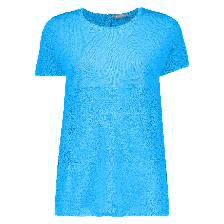

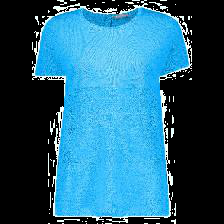

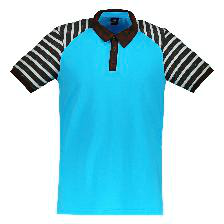

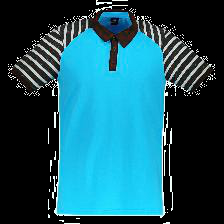

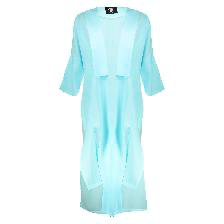

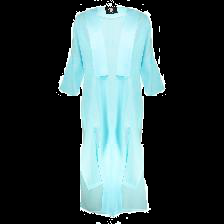

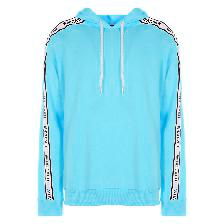

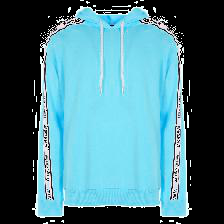

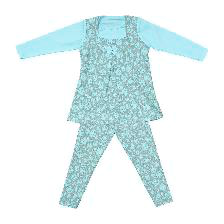

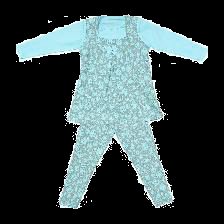

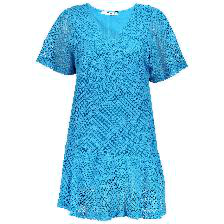

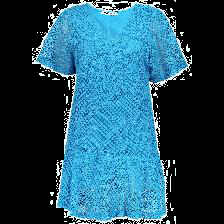

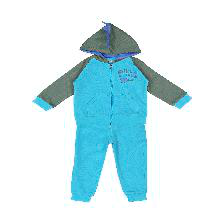

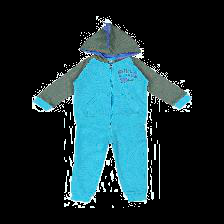

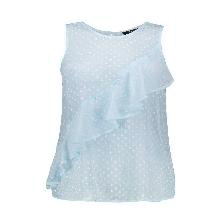

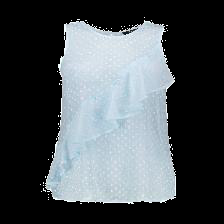

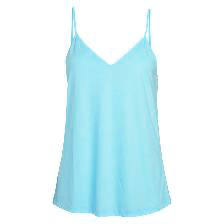

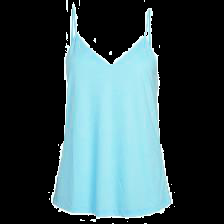

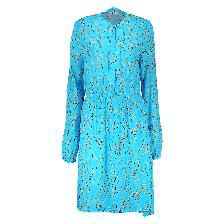

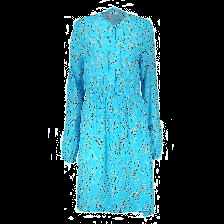

KeyboardInterrupt: ignored

In [ ]:
num_train_img = 0
for d in colormap.keys():
    folder_path = '/content/drive/My Drive/Digikala/P4/train/{}'.format(d)
    num_train_img += len(os.listdir(folder_path))
train_image=np.zeros((num_train_img,3))
train_label=np.zeros((num_train_img,))
image_name_counter = -1
for d in ['yellow']:
    folder_path = '/content/drive/My Drive/Digikala/P4/train/{}'.format(d)
    for image_name in tqdm(os.listdir(folder_path)):
        image_name_counter += 1
        img = io.imread(folder_path + '/' + image_name)[:, :, :]
        cv2_imshow(img)
        idx =np.logical_and(np.logical_and(img[:,:,0] > 245, img[:,:,1] > 245), img[:,:,2] > 245)
        mm = idx.shape[0]*idx.shape[1] - idx.sum()
        idx = np.stack((idx,idx,idx),axis=2)
        img[idx]=0.0
        cv2_imshow(img)
        if image_name_counter<140:
            continue
        break
        train_image[image_name_counter,:] = np.array(img.sum(axis=0).sum(axis=0)/mm)
        train_label[image_name_counter] = colormap[d]
    

In [ ]:
folder_path = '/content/drive/My Drive/Digikala/P4/test'
num_test_img = len(os.listdir(folder_path))
print(num_test_img)
test_image=np.zeros((num_test_img,3))
test_name = []
image_name_counter = -1
for image_name in tqdm(os.listdir(folder_path)):
    image_name_counter += 1
    img = io.imread(folder_path + '/' + image_name)[:, :, :]
    idx =np.logical_and(np.logical_and(img[:,:,0] > 245, img[:,:,1] > 245), img[:,:,2] > 245)
    mm = idx.shape[0]*idx.shape[1] - idx.sum()
    idx = np.stack((idx,idx,idx),axis=2)
    img[idx]=0.0
    img = np.min((img * 1.4,np.ones(img.shape)*255),axis=0)
    test_image[image_name_counter,:] = np.array(img.sum(axis=0).sum(axis=0)/mm)
    test_name.append(image_name)

In [ ]:
# X = np.concatenate((train_image,test_image))
# print(X.shape)
# scaler = StandardScaler()
# scl = scaler.fit(X)
# X = scl.transform(X)
# print(X,X.shape)

# train_image = X[:6239]
# test_image = X[6239:]
# print(train_image.shape)
# print(test_image.shape)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier ,NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
model = MLPClassifier((1000,100,100),verbose=1, activation='tanh',n_iter_no_change=50)
model.fit(train_image,train_label)

predict_t = model.predict(train_image)
accuracy_t = accuracy_score(train_label, predict_t)
print(accuracy_t)

In [ ]:
predict_t = model.predict(test_image)

In [ ]:
print(predict_t)

In [ ]:
file_name = ['file_name']
for i in test_name:
  file_name.append(i)

color_id = ['color_id']
for item in predict_t.astype(int):
  item_int = round(item)
  color_id.append(item_int)

In [ ]:
import csv

with open('/content/A4.csv', mode='w') as file:
    file_writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    file_writer.writerow([file_name[0],color_id[0]])
    for i,j in zip(file_name[1:],color_id[1:]):
      file_writer.writerow([str(i),str(int(j))])